In [2]:
#importing all the essential libraries that are needed for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
#Loading the csv files to pandas dataframe
data_train = pd.read_csv("Train.csv")
data_test  = pd.read_csv("Test.csv")

In [5]:
#check the shape of the training dataset to find the number of rows and columns
data_train.shape

(5410, 57)

In [6]:
#check the shape of the testing dataset
data_test.shape

(1353, 56)

In [7]:
# check if any null value is present as the first step for datapreprocessing
data_train.isnull().values.any()

True

In [8]:
# now since the previous command gave us true, we are now going to find which column has null values
data_train.isnull().sum()

Unnamed: 0                                0
Provider                                  0
age_mode                                  0
age_median                                0
deceased_sum                              0
Gender_mode                               0
Race_mode                                 0
State_mode                                0
County_mode                               0
No_days_admitted_median                   0
No_days_admitted_mode                     0
No_days_ClaimProcessing_median            0
No_days_ClaimProcessing_mode              0
AttendingPhysician_mode                   0
RenalDiseaseIndicator_mode                0
ChronicCond_Alzheimer_median              0
ChronicCond_Alzheimer_mode                0
ChronicCond_Cancer_median                 0
ChronicCond_Cancer_mode                   0
ChronicCond_Depression_median             0
ChronicCond_Depression_mode               0
ChronicCond_Diabetes_median               0
ChronicCond_Diabetes_mode       

In [9]:
# since we know which column has missing data, we are going to fill the column with mean value of that attribute
# filling with mean values is just one of the method for data cleaning.
#data_train['No_days_admitted_median'] = data_train['No_days_admitted_median'].fillna(data_train['No_days_admitted_median'].mean())
data_train['DeductibleAmtPaid_median'] = data_train['DeductibleAmtPaid_median'].fillna(data_train['DeductibleAmtPaid_median'].mean())

In [10]:
# rechecking if there are any other null values
data_train.isnull().sum()

Unnamed: 0                                0
Provider                                  0
age_mode                                  0
age_median                                0
deceased_sum                              0
Gender_mode                               0
Race_mode                                 0
State_mode                                0
County_mode                               0
No_days_admitted_median                   0
No_days_admitted_mode                     0
No_days_ClaimProcessing_median            0
No_days_ClaimProcessing_mode              0
AttendingPhysician_mode                   0
RenalDiseaseIndicator_mode                0
ChronicCond_Alzheimer_median              0
ChronicCond_Alzheimer_mode                0
ChronicCond_Cancer_median                 0
ChronicCond_Cancer_mode                   0
ChronicCond_Depression_median             0
ChronicCond_Depression_mode               0
ChronicCond_Diabetes_median               0
ChronicCond_Diabetes_mode       

In [11]:
#Changing the "PotentialFraud" column from Yes/No to a number as 1/0 
PotentialFraud_map = {'Yes' : 1, 'No' : 0}
data_train['PotentialFraud'] = data_train['PotentialFraud'].map(PotentialFraud_map)
data_train.head(5)

,Unnamed: 0,Provider,age_mode,age_median,deceased_sum,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,...,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,OperatingPhysician_mode,OtherPhysician_mode,no_of_service_provided,PotentialFraud
0,0,PRV55912,67.0,75.0,105,0,1,39,510,2.0,...,148908,1068,1420920,8600,64110.0,1068.0,['PHY370861'],['PHY387346'],107,1
1,1,PRV55907,81.0,75.0,242,0,1,39,770,1.0,...,204920,1068,1946470,3000,64490.0,0.0,['PHY375412'],"['PHY347835', 'PHY348866']",243,0
2,2,PRV56046,69.0,70.0,20,0,1,39,230,3.0,...,33632,1068,366840,7520,14952.0,1068.0,['PHY372395'],['PHY324689'],20,0
3,3,PRV52405,71.0,71.0,88,0,1,1,340,1.0,...,65148,0,656110,0,23606.0,0.0,['PHY325656'],['PHY369659'],89,0
4,4,PRV56614,72.0,72.0,26,0,1,45,780,1.5,...,33108,1068,311840,5500,13884.0,1068.0,['PHY398258'],['PHY338104'],26,0


In [12]:
#Now that the data is preprocessed, we need to select esential attributes inorder to train the data
#here we are using correlation method to find the important features
corr = data_train.corr()
corr

,Unnamed: 0,age_mode,age_median,deceased_sum,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,No_days_admitted_mode,...,OPAnnualReimbursementAmt_sum,OPAnnualReimbursementAmt_median,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,no_of_service_provided,PotentialFraud
Unnamed: 0,1.000000,-0.102506,-0.041317,-0.223796,0.134917,0.072538,0.043143,0.004089,-0.241541,-0.145795,...,-0.214498,0.155297,-0.302554,-0.269694,-0.305918,-0.202655,-0.443879,-0.391657,-0.223842,-0.370854
age_mode,-0.102506,1.000000,0.483117,0.061350,-0.056247,-0.019326,-0.008897,-0.000009,-0.026529,-0.003048,...,0.060367,0.007571,0.068986,-0.038935,0.069311,-0.035021,0.053909,-0.052530,0.061390,0.048540
age_median,-0.041317,0.483117,1.000000,0.006115,-0.094630,-0.046958,-0.030524,-0.011823,0.038510,0.031891,...,0.004405,0.012173,0.011617,0.047864,0.010854,0.016127,0.017214,0.033332,0.006092,0.008316
deceased_sum,-0.223796,0.061350,0.006115,1.000000,-0.123653,-0.033443,-0.014870,0.003694,-0.076932,-0.057250,...,0.992131,-0.037308,0.963006,-0.117326,0.960356,-0.104661,0.319219,-0.093856,0.999989,0.374160
Gender_mode,0.134917,-0.056247,-0.094630,-0.123653,1.000000,0.037460,-0.002448,0.006825,0.052278,0.053582,...,-0.121849,0.042338,-0.132097,0.037178,-0.135044,0.060836,-0.099915,0.052014,-0.123663,-0.088451
Race_mode,0.072538,-0.019326,-0.046958,-0.033443,0.037460,1.000000,-0.024698,-0.028313,0.068270,0.099797,...,-0.034366,0.061853,-0.037120,0.045851,-0.037255,0.060643,-0.030213,0.034458,-0.033451,-0.028460
State_mode,0.043143,-0.008897,-0.030524,-0.014870,-0.002448,-0.024698,1.000000,0.143991,0.032145,0.028551,...,-0.018317,0.016833,-0.025961,0.032243,-0.023095,0.025559,-0.027400,0.032112,-0.014991,0.003166
County_mode,0.004089,-0.000009,-0.011823,0.003694,0.006825,-0.028313,0.143991,1.000000,0.024389,0.019103,...,0.009166,-0.002782,0.000588,0.025251,0.000547,0.020659,-0.020131,0.026932,0.003782,-0.012711
No_days_admitted_median,-0.241541,-0.026529,0.038510,-0.076932,0.052278,0.068270,0.032145,0.024389,1.000000,0.819517,...,-0.077410,-0.007339,-0.049109,0.543947,-0.049338,0.611275,0.071389,0.689215,-0.076941,0.036525
No_days_admitted_mode,-0.145795,-0.003048,0.031891,-0.057250,0.053582,0.099797,0.028551,0.019103,0.819517,1.000000,...,-0.056882,0.009680,-0.050038,0.409970,-0.049964,0.477728,-0.000425,0.462108,-0.057257,-0.013810


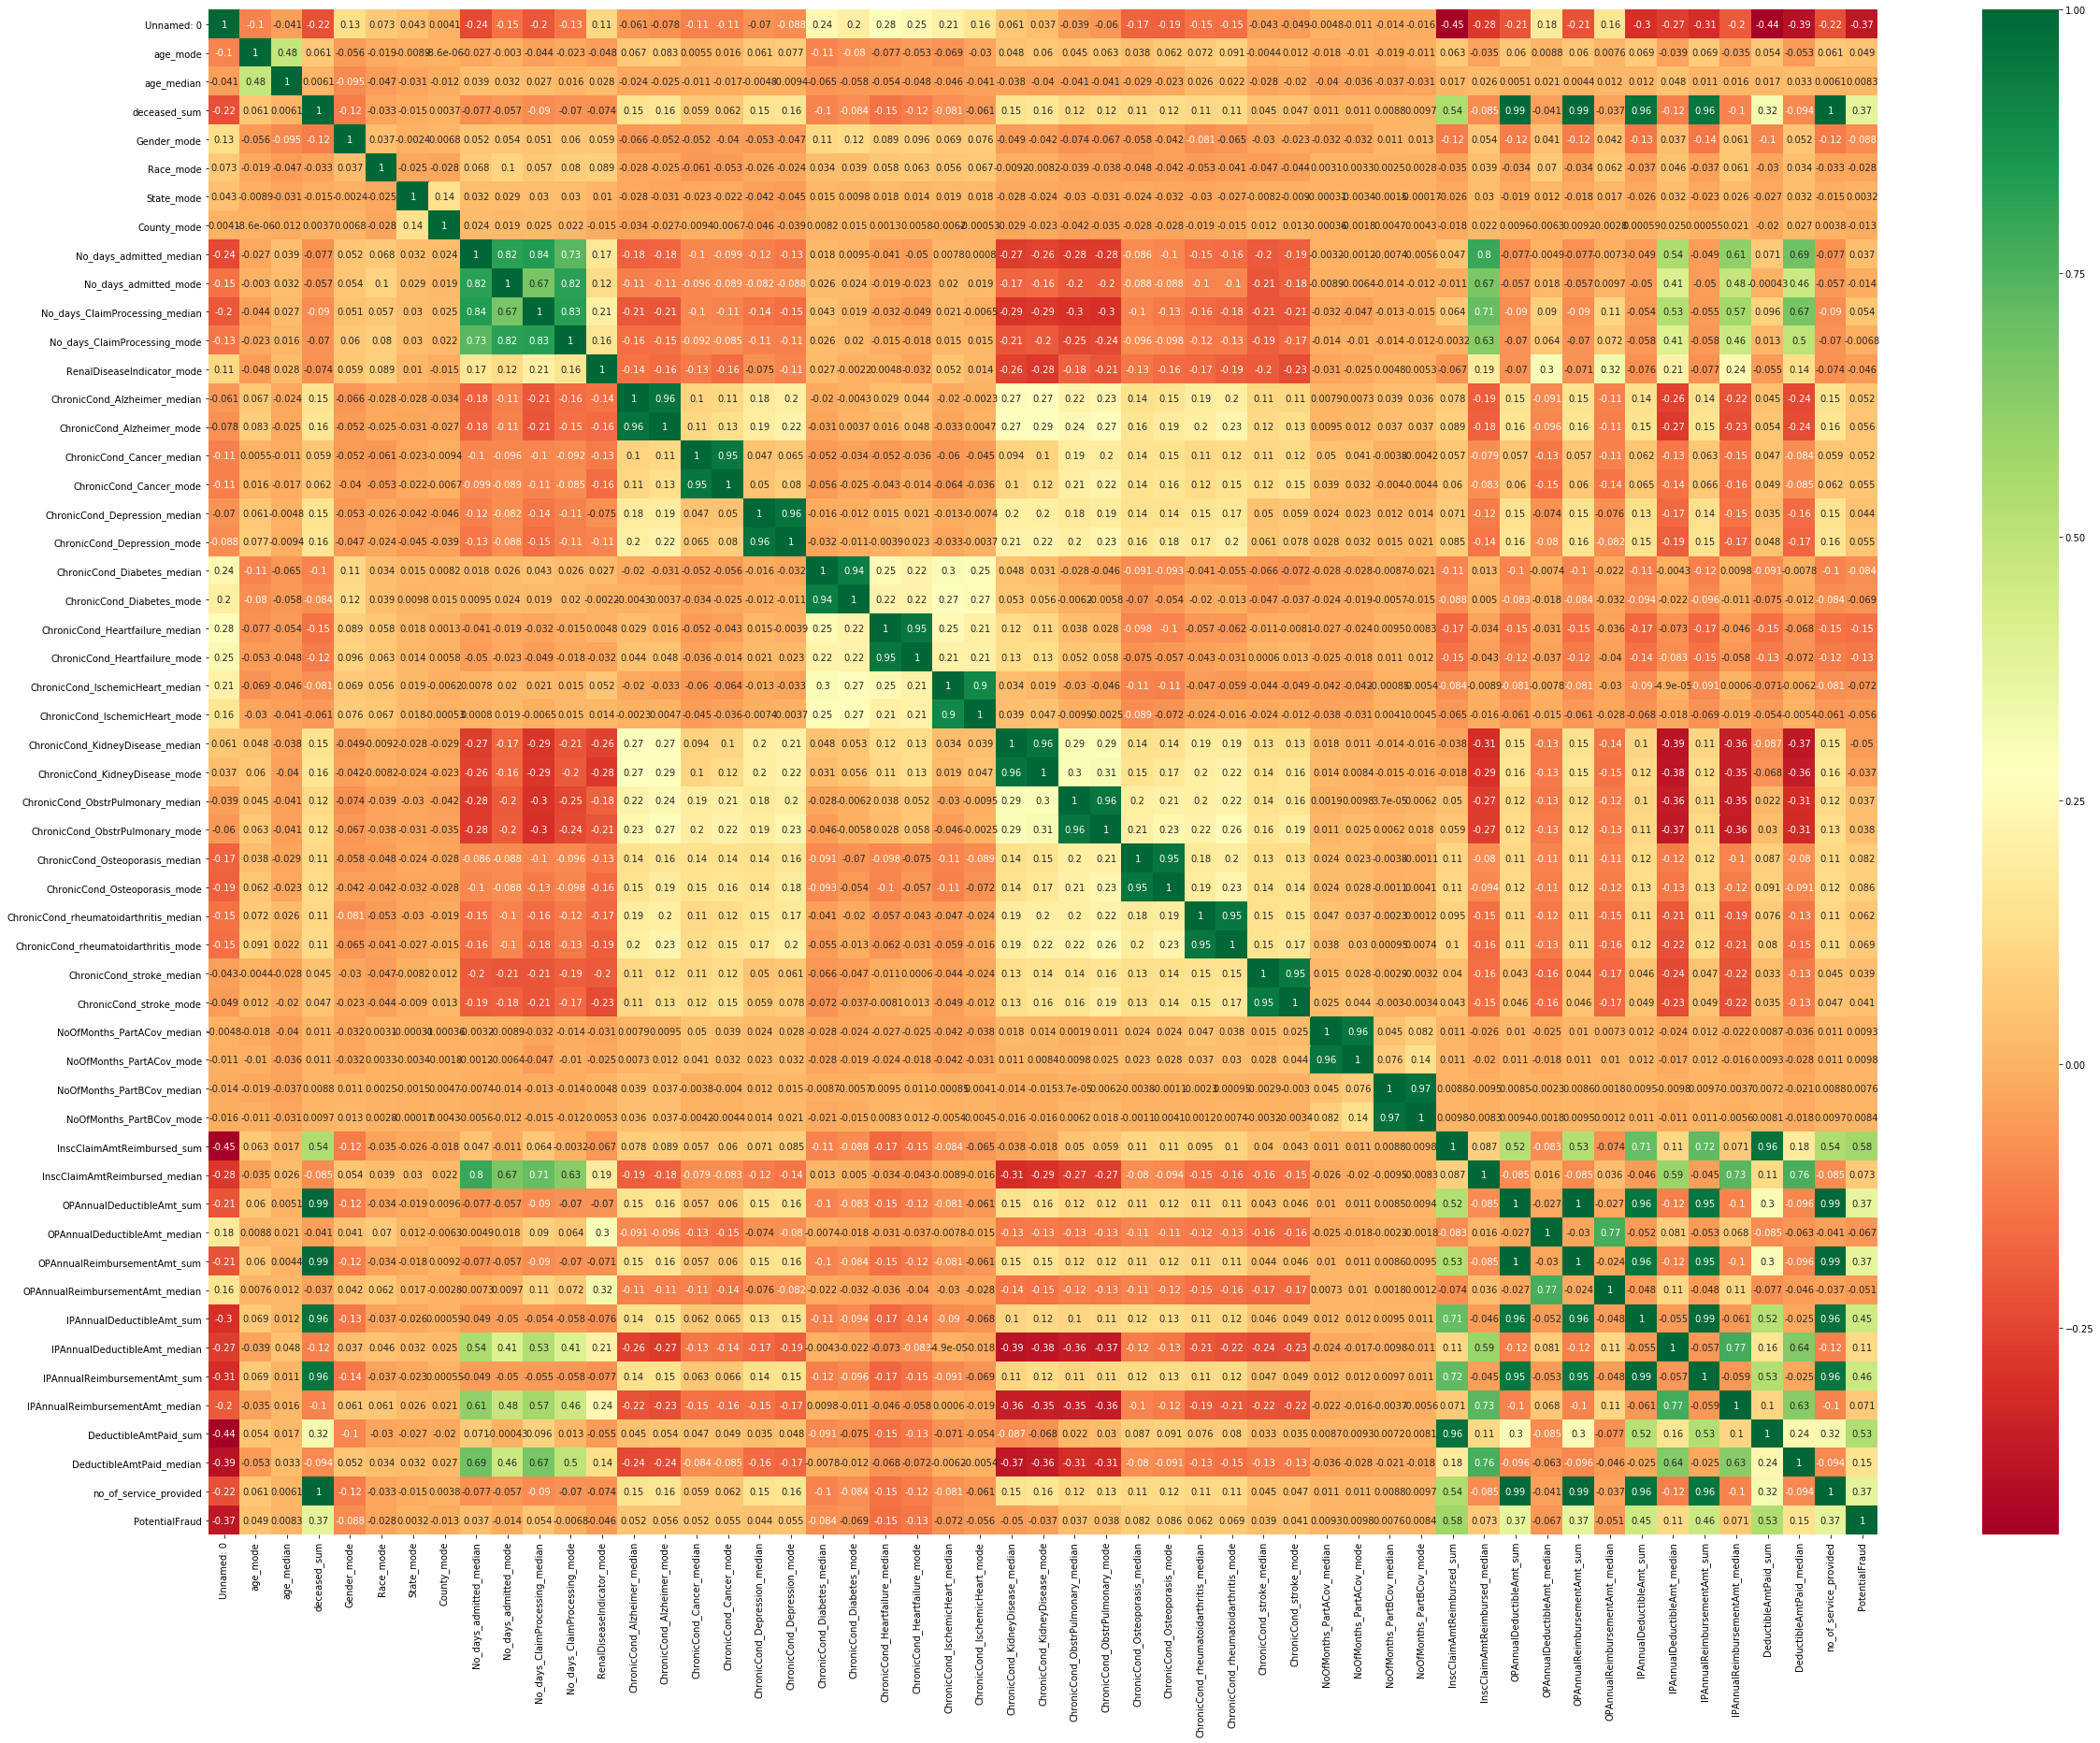

In [13]:
#inroder to get a better picture about the correlation,we are following the below steps
corr = data_train.corr()
top_corr_features = corr.index
plt.figure(figsize=(40,30))
#plot heat map
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['DeductibleAmtPaid_sum','IPAnnualReimbursementAmt_sum','IPAnnualDeductibleAmt_sum',
                  'OPAnnualReimbursementAmt_sum','OPAnnualDeductibleAmt_sum','InscClaimAmtReimbursed_sum',
                  'no_of_service_provided','deceased_sum','No_days_admitted_mode', 'No_days_ClaimProcessing_mode']
predicted_class = ['PotentialFraud']

In [15]:
X = data_train[feature_columns].values
y = data_train[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [16]:
## Applying RandomForest Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [17]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.943


In [18]:
# check if any null value is present as the first step for datapreprocessing
data_test.isnull().values.any()

False

In [19]:
# now since the previous command gave us true, we are now going to find which column has null values
data_test.isnull().sum()

Unnamed: 0                                0
Provider                                  0
age_mode                                  0
age_median                                0
deceased_sum                              0
Gender_mode                               0
Race_mode                                 0
State_mode                                0
County_mode                               0
No_days_admitted_median                   0
No_days_admitted_mode                     0
No_days_ClaimProcessing_median            0
No_days_ClaimProcessing_mode              0
AttendingPhysician_mode                   0
RenalDiseaseIndicator_mode                0
ChronicCond_Alzheimer_median              0
ChronicCond_Alzheimer_mode                0
ChronicCond_Cancer_median                 0
ChronicCond_Cancer_mode                   0
ChronicCond_Depression_median             0
ChronicCond_Depression_mode               0
ChronicCond_Diabetes_median               0
ChronicCond_Diabetes_mode       

In [20]:
data_predict_test = data_test[feature_columns].values
data_test['PotentialFraud'] = random_forest_model.predict(data_predict_test)

In [21]:
data_test.head(10)

,Unnamed: 0,Provider,age_mode,age_median,deceased_sum,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,...,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,OperatingPhysician_mode,OtherPhysician_mode,no_of_service_provided,PotentialFraud
0,0,PRV57070,65.0,71.0,12,0,1,45,910,5.0,...,24564,2136,310620,20290,12816.0,1068.0,['PHY351953'],['PHY351953'],12,0
1,1,PRV54750,71.0,71.0,38,0,1,31,620,1.0,...,19824,0,153690,0,9812.0,0.0,"['PHY332099', 'PHY409863']","['PHY332099', 'PHY424568']",38,0
2,2,PRV53758,72.0,74.0,182,0,1,22,20,2.0,...,238318,1068,2266640,6070,118588.0,1068.0,['PHY342551'],['PHY413308'],183,1
3,3,PRV55825,76.0,73.0,121,0,1,38,250,2.0,...,153224,1068,1385590,7000,84512.0,1068.0,['PHY329540'],['PHY334783'],124,0
4,4,PRV52338,66.0,72.0,1545,0,1,11,530,1.0,...,985104,0,8640800,0,162722.0,0.0,['PHY424866'],['PHY411572'],1551,1
5,5,PRV55544,73.0,73.0,37,0,1,36,200,1.0,...,30972,1068,257130,4000,13076.0,0.0,"['PHY412576', 'PHY421435']",['PHY426656'],37,0
6,6,PRV53275,70.0,72.0,347,0,1,18,550,1.0,...,359904,1068,3324140,3605,142864.0,0.0,['PHY389026'],['PHY412408'],350,1
7,7,PRV54989,83.0,76.0,66,0,1,33,400,3.0,...,143304,1068,847690,7045,44906.0,1068.0,['PHY357865'],"['PHY337675', 'PHY413954']",66,1
8,8,PRV57214,72.0,72.0,612,0,1,49,820,1.0,...,341276,0,4064080,0,70652.0,0.0,['PHY432053'],['PHY433901'],618,1
9,9,PRV52117,76.0,75.0,44,0,1,10,580,2.0,...,52332,1068,507140,8000,33268.0,1068.0,"['PHY332154', 'PHY369576', 'PHY387696']","['PHY327169', 'PHY329196', 'PHY332154', 'PHY34...",45,0


In [22]:
#Changing the "PotentialFraud" column from 0/1 to a number as No/Yes 
PotentialFraud_map = {1 : 'Yes', 0 : 'No'}
data_test['PotentialFraud'] = data_test['PotentialFraud'].map(PotentialFraud_map)
data_test.head(10)

,Unnamed: 0,Provider,age_mode,age_median,deceased_sum,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,...,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,OperatingPhysician_mode,OtherPhysician_mode,no_of_service_provided,PotentialFraud
0,0,PRV57070,65.0,71.0,12,0,1,45,910,5.0,...,24564,2136,310620,20290,12816.0,1068.0,['PHY351953'],['PHY351953'],12,No
1,1,PRV54750,71.0,71.0,38,0,1,31,620,1.0,...,19824,0,153690,0,9812.0,0.0,"['PHY332099', 'PHY409863']","['PHY332099', 'PHY424568']",38,No
2,2,PRV53758,72.0,74.0,182,0,1,22,20,2.0,...,238318,1068,2266640,6070,118588.0,1068.0,['PHY342551'],['PHY413308'],183,Yes
3,3,PRV55825,76.0,73.0,121,0,1,38,250,2.0,...,153224,1068,1385590,7000,84512.0,1068.0,['PHY329540'],['PHY334783'],124,No
4,4,PRV52338,66.0,72.0,1545,0,1,11,530,1.0,...,985104,0,8640800,0,162722.0,0.0,['PHY424866'],['PHY411572'],1551,Yes
5,5,PRV55544,73.0,73.0,37,0,1,36,200,1.0,...,30972,1068,257130,4000,13076.0,0.0,"['PHY412576', 'PHY421435']",['PHY426656'],37,No
6,6,PRV53275,70.0,72.0,347,0,1,18,550,1.0,...,359904,1068,3324140,3605,142864.0,0.0,['PHY389026'],['PHY412408'],350,Yes
7,7,PRV54989,83.0,76.0,66,0,1,33,400,3.0,...,143304,1068,847690,7045,44906.0,1068.0,['PHY357865'],"['PHY337675', 'PHY413954']",66,Yes
8,8,PRV57214,72.0,72.0,612,0,1,49,820,1.0,...,341276,0,4064080,0,70652.0,0.0,['PHY432053'],['PHY433901'],618,Yes
9,9,PRV52117,76.0,75.0,44,0,1,10,580,2.0,...,52332,1068,507140,8000,33268.0,1068.0,"['PHY332154', 'PHY369576', 'PHY387696']","['PHY327169', 'PHY329196', 'PHY332154', 'PHY34...",45,No
